# Прогнозирование лекарственных средств

В рамках данной работы нам предстоит определить по входным данным определить тип лекарства которое принимает пациент.

## Предварительная обработка и исследовательский анализ данных

Для начала импортируем `pandas` и импротируем данные.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/drug200.csv")

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


После того как мы просмотрели информацию о данных мы видим что тут содержатся:
- Возраст (Age)
- Пол (Sex)
- Уровни артериального давления (BP)
- Уровни холестерина (Cholesterol)
- Рацион Na в калий (Na_to_K)
- Тип препарата (Drug)

Совершенно очевидно, что целевой переменной здесь будет столбец `Drug`

Посчитаем количчества вхождений для столбцов `BP`, `Cholesterol` и `Drug`

In [5]:
df["BP"].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [6]:
df["Cholesterol"].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [7]:
df["Drug"].value_counts()

DrugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64

Данных нету значений `NaN`б и это очень хорошо. Поэтому, обработаем столбцы с типом `object` с помощью `LableEncoder` для того чтобы модель понимала наши данные. И разделим фрейм на две версии позже будет понятно для чего.

In [14]:
df_new = pd.DataFrame(columns=["Age", "Sex", "BP", "Cholesterol", "Na_to_K", "Drug"])

In [15]:
from sklearn.preprocessing import LabelEncoder
df_new["Age"] = df["Age"]
df_new["Na_to_K"] = df["Na_to_K"]
# Подмена на числовые значения
le = LabelEncoder()
df_new["Sex"] = le.fit_transform(df["Sex"])
le = LabelEncoder()
df_new["BP"] = le.fit_transform(df["BP"])
le = LabelEncoder()
df_new["Cholesterol"] = le.fit_transform(df["Cholesterol"])
le = LabelEncoder()
df_new["Drug"] = le.fit_transform(df["Drug"])

In [16]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [18]:
df_new.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


### Вывод по предобработке
В данном разделе мы ипортировали и предобработали данные для того чтобы обучить нашу модель и визуализировать данные.

## Визуализация данных

### Распределение лекарственных средств
Просмотрим в каком соотношении у нас находятся лекарственные средства из нашей таблицы.  
Ранее было разделение на старый врейм и новый. Старый нужен нам, чтобы визуализировать данные, а новый чтобы обучить модель.

In [20]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='Drug', ylabel='count'>

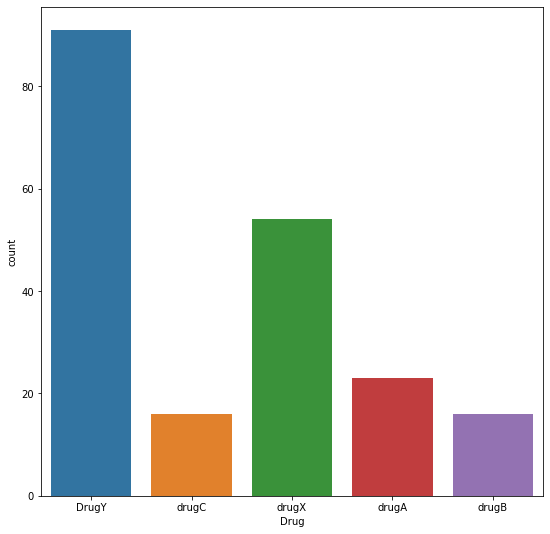

In [23]:
plt.figure(figsize=(9, 9))
sns.countplot(df["Drug"])

Если бы не было разделения, то на графике вместо названия лекарственных  средств мы бы наблюдали сухие цифры

### Соотношение полов

<AxesSubplot:xlabel='Sex', ylabel='count'>

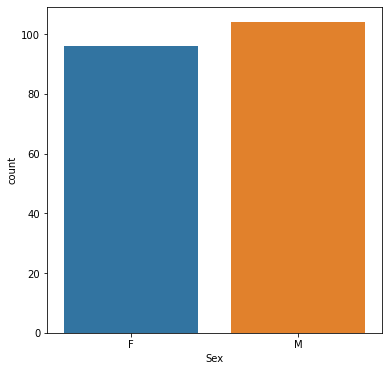

In [29]:
plt.figure(figsize=(6, 6))
sns.countplot(df["Sex"])

### Соотношение артериального давления

<AxesSubplot:xlabel='BP', ylabel='count'>

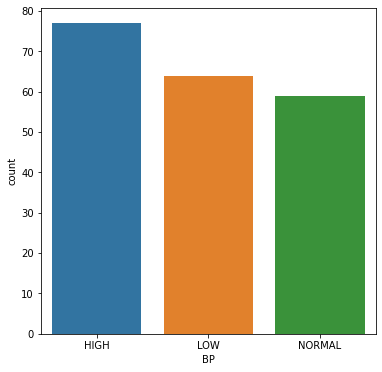

In [30]:
plt.figure(figsize=(6, 6))
sns.countplot(df["BP"])

### Соотношение холестерина

<AxesSubplot:xlabel='Cholesterol', ylabel='count'>

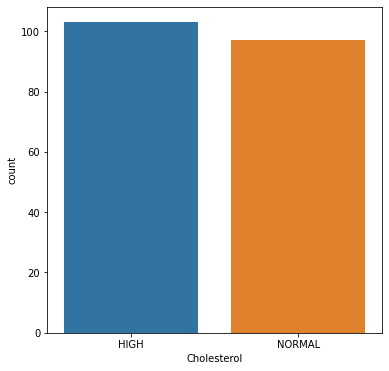

In [32]:
plt.figure(figsize=(6, 6))
sns.countplot(df["Cholesterol"])

### Соотношение Na к K

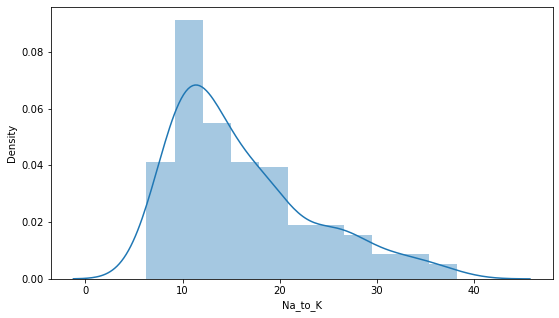

In [27]:
plt.figure(figsize = (9,5))
sns.distplot(df.Na_to_K)
plt.show()

### Возрастной диапазон

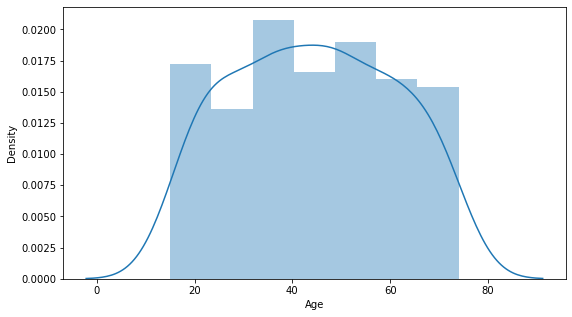

In [28]:
plt.figure(figsize = (9,5))
sns.distplot(df.Age)
plt.show()

### Вывод
МЫ провизуализировали наши данные, просмотрели:
- Соотношение лекарственных средств
- Соотношение полов
- Соотношение артериального давления
- Соотношение холестерина 
- Соотношение Na к K
- Возросной диапазон

Далее мы приступаем к разделению на тренировочную и тестовую выборки и построению моделей машинного обучения.

## Разделение на тестовую и обучающую выборки
Сначала следует разделиьт целевую переменную и признаки, а затем создать тестовую и тренировочную выборки с помощью `train_test_split`

In [35]:
x = df_new.drop(columns="Drug", axis=1)
y = df_new["Drug"].values

### Раазбиение на тренировочные данные и тестовые
Т.к. данных у нас мало то следует разбивать данные в соотношении 10/90.

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, test_size=0.1)

### Разметность тренировочных и тестовых сетов 

In [37]:
print(x_train.shape)
print(y_train.shape)

(180, 5)
(180,)


### Вывод
Разбиение на выборки прошло удачно, с разметностью все в порядке поэтому приступаем к обучению моделей.

## Построение моделей машинного обучения

Далее мы обучим наши модели по трем различным методам:
- Рандомный лес 
- Близжайшие соседи
- XGBoost

После того как обучим посмотрим какая модель проявила себя лучше всего.  
Для начала импортируем их

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
# Для метрики
from sklearn.metrics import classification_report

### Близжайшие соседи

In [39]:
neighbors = [3, 6, 9]
train_score_kn = []
test_score_kn = []
for nei in neighbors:
    kn = KNeighborsClassifier(n_jobs=-1, n_neighbors=nei)
    kn.fit(x_train, y_train)
    train_score_kn.append(kn.score(x_train, y_train))
    test_score_kn.append(kn.score(x_test, y_test))
    print(classification_report(y_test, kn.predict(x_test)))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.80      0.89         5
           2       1.00      1.00      1.00         1
           4       0.80      0.80      0.80         5

    accuracy                           0.90        20
   macro avg       0.93      0.90      0.91        20
weighted avg       0.91      0.90      0.90        20

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         1
           4       0.57      0.80      0.67         5

    accuracy                           0.80        20
   macro avg       0.62      0.60      0.59        20
weighted avg       0.80      0.80      0.78        20

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.

In [40]:
print("TRAIN", train_score_kn)
print("TEST", test_score_kn)

TRAIN [0.85, 0.7888888888888889, 0.7333333333333333]
TEST [0.9, 0.8, 0.8]


### Рандомный лес

In [42]:
forest = [50, 100, 200]
train_score_rf = []
test_score_rf = []
for fo in forest:
    rf = RandomForestClassifier(n_estimators=fo, n_jobs=-1)
    rf.fit(x_train, y_train)
    train_score_rf.append(rf.score(x_train, y_train))
    test_score_rf.append(rf.score(x_test, y_test))
    print(classification_report(y_test, rf.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.

In [43]:
print("TRAIN", train_score_rf)
print("TEST", test_score_rf)

TRAIN [1.0, 1.0, 1.0]
TEST [1.0, 1.0, 1.0]


### XGBoost

In [46]:
xgb = XGBClassifier()
rf.fit(x_train, y_train)
print("TRAIN", rf.score(x_train, y_train))
print("TEST", rf.score(x_test, y_test))
print(classification_report(y_test, rf.predict(x_test)))

TRAIN 1.0
TEST 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



### Вывод
В данном разделе были обучены три модели по трем различным методам. В двух методах была произведена оптимизация гипперпараметров что непосредственно повлияло на результат.  
Результаты по тестовой выборке:
- Близжайшие соседи - 0.8
- Рандомный лес - 1.0
- XGBoost - 1.0

Как видно из вышеперечисленных результатов в целом все модели показали себя одинаково хорошо, еинственное метод близжайших соседей показал немного худший результат.

## Заключение
В рамках данной работы было определенно по входным данным тип лекарства которое принимает пациент. Данные были предобработаны, провизуализированны и разбиты на тестовые и обучающие выборки, что в последствии позволило обучить модели.